In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage import io
import torch
from glob import glob
import os

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


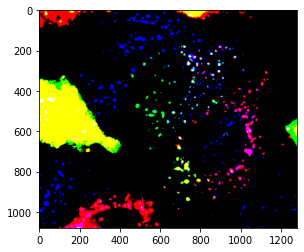

In [4]:
img=io.imread("E:\MBDS Materials\BMDSIS\\Final Delivery\Testing Folder\composite_20190508-VIP36-EGFP-Noc-02.tif")
plt.imshow(img)

In [42]:
folders_composite=glob("Composite Images/*/")
folders_composite

['Composite Images\\20190508-C2GNT1-EGFP-Noc-01-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-02-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-03-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-04-Data Preparation\\',
 'Composite Images\\20190508-C2GNT1-EGFP-Noc-05-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-01-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-02-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-03-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-04-Data Preparation\\',
 'Composite Images\\20190508-GALNT4-EGFP-Noc-05-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-01-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-02-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-03-Data Preparation\\',
 'Composite Images\\20190508-GALNT8-EGFP-Noc-04-Data Preparation\\',
 'Composite Images\\20190508-GALNT

In [43]:
labels=pd.read_csv('labels.csv',index_col=0)
labels

,label
0,20190508-C2GNT1-EGFP-Noc-01
1,20190508-C2GNT1-EGFP-Noc-02
2,20190508-C2GNT1-EGFP-Noc-03
3,20190508-C2GNT1-EGFP-Noc-04
4,20190508-C2GNT1-EGFP-Noc-05
5,20190508-GALNT4-EGFP-Noc-01
6,20190508-GALNT4-EGFP-Noc-02
7,20190508-GALNT4-EGFP-Noc-03
8,20190508-GALNT4-EGFP-Noc-04
9,20190508-GALNT4-EGFP-Noc-05


In [44]:
test_label=list(labels.iloc[32:38]['label'])
test_label

['20190823-EGFP-Golph3-Noc-05',
 '20190823-EGFP-Golph3-Noc-06',
 '20190823-EGFP-Golph3-Noc-07',
 '20190823-EGFP-Golph3-Noc-08',
 '20190823-EGFP-Golph3-Noc-09',
 '20190823-EGFP-Golph3-Noc-10']

In [45]:
test_label_ind=list(labels.iloc[32:38].index)
test_label_ind

[32, 33, 34, 35, 36, 37]

In [46]:
val_label=list(labels.iloc[20:26]['label'])
val_label

['20190508-VIP36-EGFP-Noc-01',
 '20190508-VIP36-EGFP-Noc-02',
 '20190508-VIP36-EGFP-Noc-03',
 '20190508-VIP36-EGFP-Noc-04',
 '20190508-VIP36-EGFP-Noc-05',
 '20190508-VIP36-EGFP-Noc-06']

In [47]:
val_label_ind=list(labels.iloc[20:26].index)
val_label_ind

[20, 21, 22, 23, 24, 25]

In [48]:
def Transform(img):
    test=np.swapaxes(img,0,2)
    test=np.swapaxes(test,1,2)
    return torch.tensor(np.array([test],dtype='f'))

In [49]:
def GetObject(img,top,bottom,left,right):
    roi=img[top:bottom+1,left:right+1]
    return cv2.resize(roi, dsize=(17, 17), interpolation=cv2.INTER_CUBIC)

In [50]:
def Predict(Model,X):
    test_pred = Model(X)
    res =test_pred.data
    y_pred=torch.max(res,1)[1]
    return y_pred

In [51]:
def Scale(top,bottom,left,right):
    if top-2>=0:
        top=top-2
    elif top-1>=0:
        top=top-1
    
    if left-2>=0:
        left=left-2
    elif left-1>=0:
        left=left-1

    if bottom+3<1080:
        bottom=bottom+3
    elif bottom+2<1080:
        bottom=bottom+2
    elif bottom+1<1080:
        bottom=bottom+1
    
    if right+3<1280:
        right=right+3
    elif right+2<1280:
        right=right+2
    elif right+1<1280:
        right=right+1
    
    return top,bottom,left,right

In [52]:
def PredictGolgiCoordinates(sample_index,model):
    for i in sample_index:
        img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
        img=io.imread(img_file_path)

        co_file_path=folders_composite[i]+"\\{}_all_coordinates.csv".format(labels.iloc[i].values[0])
        co_df=pd.read_csv(co_file_path,index_col=0)

        roi_pred_path=folders_composite[i]+"\\Predicted ROI Coordinates"
        if not os.path.exists(roi_pred_path):
            os.mkdir(roi_pred_path)

        label=0

        for index,row in co_df.iterrows():
            top=row['top']
            bottom=row['bottom']
            left=row['left']
            right=row['right']

            obj=GetObject(img,top,bottom,left,right)
            obj_tensor=Transform(obj)
            #print(model(obj_tensor)[0])
            if Predict(model,obj_tensor)[0]==1:
                top,bottom,left,right=Scale(top,bottom,left,right)
                coordinates=pd.DataFrame({"X":[left,left,right,right],'Y':[bottom,top,top,bottom]})
                coordinates.to_csv(roi_pred_path+"\\XY_Coordinates_{}.csv".format(label))
                label+=1
        
        print("Done with index {}".format(i))

In [53]:
class Model_VGG(torch.nn.Module):
    def __init__(self):
        super(Model_VGG, self).__init__()

        self.cnn_layers = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(3, 32, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            torch.nn.Conv2d(32, 64, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(64, 128, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(128, 512, kernel_size=2, stride=1, padding=1),
            #BatchNorm2d(4),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = torch.nn.Sequential(
            torch.nn.Linear(2048, 512),
            torch.nn.Dropout(0.1),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 128),
            torch.nn.Dropout(0.1),
            torch.nn.ReLU(),
            torch.nn.Linear(128,2)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [54]:
class Model_VGG_v2(torch.nn.Module):
    def __init__(self):
        super(Model_VGG_v2, self).__init__()

        self.cnn_layers = torch.nn.Sequential(
            # Defining a 2D convolution layer
            torch.nn.Conv2d(3, 32, kernel_size=2, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            torch.nn.Conv2d(32, 64, kernel_size=2, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(64, 128, kernel_size=2, stride=1, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            torch.nn.Conv2d(128, 512, kernel_size=2, stride=1, padding=1),
            torch.nn.BatchNorm2d(512),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = torch.nn.Sequential(
            torch.nn.Linear(2048, 512),
            torch.nn.Dropout(0.1),
            torch.nn.ReLU(),
            torch.nn.Linear(512, 128),
            torch.nn.Dropout(0.1),
            torch.nn.ReLU(),
            torch.nn.Linear(128,2)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [55]:
model=torch.load('model_6_2_2.pkl')

In [56]:
PredictGolgiCoordinates(test_label_ind,model)

Done with index 32
Done with index 33
Done with index 34
Done with index 35
Done with index 36
Done with index 37


In [57]:
test_label

['20190823-EGFP-Golph3-Noc-05',
 '20190823-EGFP-Golph3-Noc-06',
 '20190823-EGFP-Golph3-Noc-07',
 '20190823-EGFP-Golph3-Noc-08',
 '20190823-EGFP-Golph3-Noc-09',
 '20190823-EGFP-Golph3-Noc-10']

In [58]:
PredictGolgiCoordinates(val_label_ind,model)

Done with index 20
Done with index 21
Done with index 22
Done with index 23
Done with index 24
Done with index 25


In [59]:
val_label

['20190508-VIP36-EGFP-Noc-01',
 '20190508-VIP36-EGFP-Noc-02',
 '20190508-VIP36-EGFP-Noc-03',
 '20190508-VIP36-EGFP-Noc-04',
 '20190508-VIP36-EGFP-Noc-05',
 '20190508-VIP36-EGFP-Noc-06']

In [60]:
model_6_2_1=torch.load('model_6_2_1.pkl')
model_6_2_2=torch.load('model_6_2_2.pkl')
model_6_2_3=torch.load('model_6_2_3.pkl')
model_6_3_1=torch.load('model_6_3_1.pkl')
model_6_3_2=torch.load('model_6_3_2.pkl')
model_6_3_3=torch.load('model_6_3_3.pkl')

In [61]:
def Transform_v2(img):
    test=np.swapaxes(img,0,2)
    test=np.swapaxes(test,1,2)
    return np.array(test,dtype='f')

In [62]:
x_val=[]
y_val=[]

for i in val_label_ind:
    img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
    img=io.imread(img_file_path)

    golgy_co_file_path=folders_composite[i]+"\\{}_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    golgy_co_df=pd.read_csv(golgy_co_file_path,index_col=0)

    for index,row in golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform_v2(obj)
        x_val.append(obj_tensor)
        y_val.append(1)
    
    non_golgy_co_file_path=folders_composite[i]+"\\{}_non_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    non_golgy_co_df=pd.read_csv(non_golgy_co_file_path,index_col=0)

    for index,row in non_golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform(obj)
        x_val.append(obj_tensor)
        y_val.append(0)

In [63]:
x_test=[]
y_test=[]

for i in test_label_ind:
    img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
    img=io.imread(img_file_path)

    golgy_co_file_path=folders_composite[i]+"\\{}_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    golgy_co_df=pd.read_csv(golgy_co_file_path,index_col=0)

    for index,row in golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform_v2(obj)
        x_test.append(obj_tensor)
        y_test.append(1)
    
    non_golgy_co_file_path=folders_composite[i]+"\\{}_non_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    non_golgy_co_df=pd.read_csv(non_golgy_co_file_path,index_col=0)

    for index,row in non_golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform(obj)
        x_test.append(obj_tensor)
        y_test.append(0)

In [64]:
combined_label_ind=[]
for i in test_label_ind:
    combined_label_ind.append(i)
for i in val_label_ind:
    combined_label_ind.append(i)

In [65]:
x_total=[]
y_total=[]

for i in combined_label_ind:
    img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
    img=io.imread(img_file_path)

    golgy_co_file_path=folders_composite[i]+"\\{}_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    golgy_co_df=pd.read_csv(golgy_co_file_path,index_col=0)

    for index,row in golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform_v2(obj)
        x_total.append(obj_tensor)
        y_total.append(1)
    
    non_golgy_co_file_path=folders_composite[i]+"\\{}_non_golgy_coordinates.csv".format(labels.iloc[i].values[0])
    non_golgy_co_df=pd.read_csv(non_golgy_co_file_path,index_col=0)

    for index,row in non_golgy_co_df.iterrows():
        top=row['top']
        bottom=row['bottom']
        left=row['left']
        right=row['right']

        obj=GetObject(img,top,bottom,left,right)
        obj_tensor=Transform_v2(obj)
        x_total.append(obj_tensor)
        y_total.append(0)

In [66]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [67]:
def PrintReport(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  print(classification_report(y_test, y_pred, target_names=['Non-Golgy','Golgy'] ))
  sns.heatmap(cm, annot=True,fmt='g',cmap ='Reds',xticklabels=['Non-Golgy','Golgy'],yticklabels=['Non-Golgy','Golgy'])
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')

In [68]:
def EsemblePredict(X):
    all_res=[]
    for x in X:
        x_in=torch.tensor(np.reshape(x,(1,3,17,17)))
        res=[Predict(model_6_2_2,x_in)[0].data.numpy(),Predict(model_6_2_3,x_in)[0].data.numpy(),Predict(model_6_3_3,x_in)[0].data.numpy()]
        if res.count(0)>res.count(1):
            all_res.append(0)
        else:
            all_res.append(1)
    return np.array(all_res)

<ipython-input-68-4ba0c9ac122b>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_in=torch.tensor(np.reshape(x,(1,3,17,17)))
              precision    recall  f1-score   support

   Non-Golgy       0.81      0.92      0.86       250
       Golgy       0.78      0.57      0.66       126

    accuracy                           0.80       376
   macro avg       0.80      0.75      0.76       376
weighted avg       0.80      0.80      0.79       376



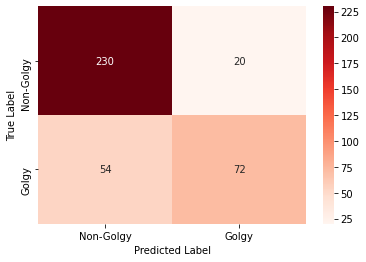

In [69]:
y_pred=EsemblePredict(x_test)
PrintReport(y_test,y_pred)

<ipython-input-68-4ba0c9ac122b>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_in=torch.tensor(np.reshape(x,(1,3,17,17)))
              precision    recall  f1-score   support

   Non-Golgy       0.86      0.86      0.86       284
       Golgy       0.80      0.79      0.79       196

    accuracy                           0.83       480
   macro avg       0.83      0.83      0.83       480
weighted avg       0.83      0.83      0.83       480



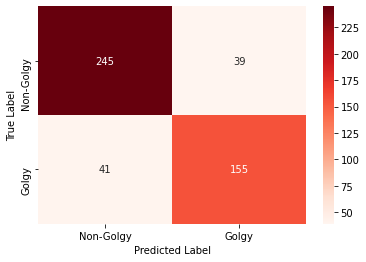

In [70]:
y_pred=EsemblePredict(x_val)
PrintReport(y_val,y_pred)

In [71]:
for x in x_total:
    print(x.shape)

(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 17, 17)
(3, 

              precision    recall  f1-score   support

   Non-Golgy       0.71      0.84      0.77       534
       Golgy       0.62      0.43      0.51       322

    accuracy                           0.69       856
   macro avg       0.67      0.64      0.64       856
weighted avg       0.68      0.69      0.67       856



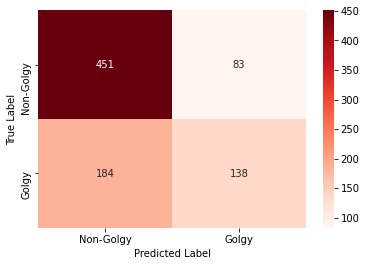

In [72]:
y_pred=Predict(model_6_2_1,torch.tensor(x_total))
PrintReport(y_total,y_pred)

              precision    recall  f1-score   support

   Non-Golgy       0.82      0.91      0.86       534
       Golgy       0.82      0.67      0.74       322

    accuracy                           0.82       856
   macro avg       0.82      0.79      0.80       856
weighted avg       0.82      0.82      0.82       856



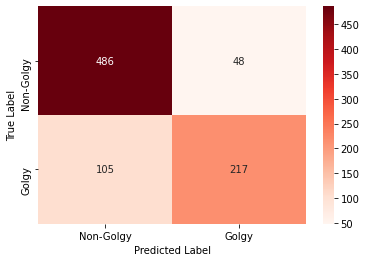

In [73]:
y_pred=Predict(model_6_2_2,torch.tensor(x_total))
PrintReport(y_total,y_pred)

              precision    recall  f1-score   support

   Non-Golgy       0.84      0.88      0.86       534
       Golgy       0.78      0.71      0.75       322

    accuracy                           0.82       856
   macro avg       0.81      0.80      0.80       856
weighted avg       0.82      0.82      0.82       856



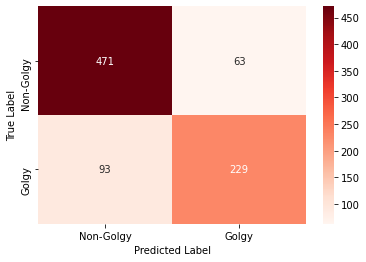

In [74]:
y_pred=Predict(model_6_2_3,torch.tensor(x_total))
PrintReport(y_total,y_pred)

              precision    recall  f1-score   support

   Non-Golgy       0.85      0.71      0.77       534
       Golgy       0.62      0.80      0.70       322

    accuracy                           0.74       856
   macro avg       0.74      0.75      0.74       856
weighted avg       0.77      0.74      0.74       856



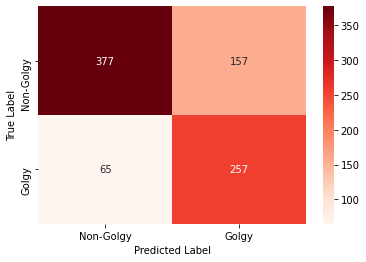

In [75]:
y_pred=Predict(model_6_3_1,torch.tensor(x_total))
PrintReport(y_total,y_pred)

              precision    recall  f1-score   support

   Non-Golgy       0.93      0.66      0.78       534
       Golgy       0.62      0.92      0.74       322

    accuracy                           0.76       856
   macro avg       0.78      0.79      0.76       856
weighted avg       0.82      0.76      0.76       856



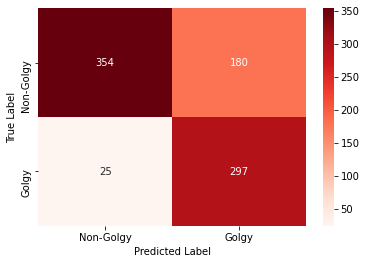

In [76]:
y_pred=Predict(model_6_3_2,torch.tensor(x_total))
PrintReport(y_total,y_pred)

              precision    recall  f1-score   support

   Non-Golgy       0.82      0.87      0.84       534
       Golgy       0.76      0.69      0.72       322

    accuracy                           0.80       856
   macro avg       0.79      0.78      0.78       856
weighted avg       0.80      0.80      0.80       856



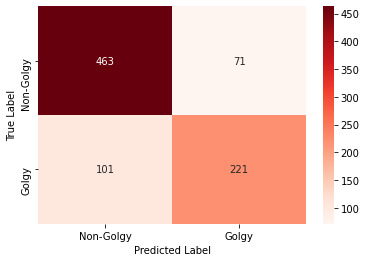

In [77]:
y_pred=Predict(model_6_3_3,torch.tensor(x_total))
PrintReport(y_total,y_pred)

              precision    recall  f1-score   support

   Non-Golgy       0.84      0.90      0.87       534
       Golgy       0.80      0.71      0.75       322

    accuracy                           0.83       856
   macro avg       0.82      0.80      0.81       856
weighted avg       0.82      0.83      0.82       856



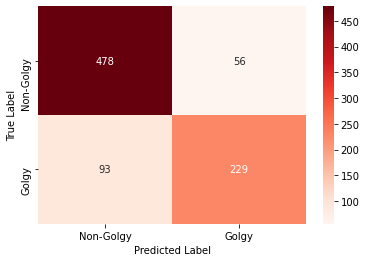

In [78]:
y_pred=EsemblePredict(x_total)
PrintReport(y_total,y_pred)

In [79]:
def PredictGolgiCoordinates_Ensemble(sample_index):
    for i in sample_index:
        img_file_path=folders_composite[i]+"\\composite_{}.tif".format(labels.iloc[i].values[0])
        img=io.imread(img_file_path)

        co_file_path=folders_composite[i]+"\\{}_all_coordinates.csv".format(labels.iloc[i].values[0])
        co_df=pd.read_csv(co_file_path,index_col=0)

        roi_pred_path=folders_composite[i]+"\\Predicted ROI Coordinates - Ensemble Method"
        if not os.path.exists(roi_pred_path):
            os.mkdir(roi_pred_path)

        label=0

        for index,row in co_df.iterrows():
            top=row['top']
            bottom=row['bottom']
            left=row['left']
            right=row['right']

            obj=GetObject(img,top,bottom,left,right)
            obj_tensor=Transform(obj)
            #print(model(obj_tensor)[0])
            if EsemblePredict(obj_tensor)[0]==1:
                top,bottom,left,right=Scale(top,bottom,left,right)
                coordinates=pd.DataFrame({"X":[left,left,right,right],'Y':[bottom,top,top,bottom]})
                coordinates.to_csv(roi_pred_path+"\\XY_Coordinates_{}.csv".format(label))
                label+=1
        
        print("Done with index {}".format(i))

In [80]:
PredictGolgiCoordinates_Ensemble(combined_label_ind)

<ipython-input-68-4ba0c9ac122b>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_in=torch.tensor(np.reshape(x,(1,3,17,17)))
Done with index 32
Done with index 33
Done with index 34
Done with index 35
Done with index 36
Done with index 37
Done with index 20
Done with index 21
Done with index 22
Done with index 23
Done with index 24
Done with index 25
